In [1]:
import gymnasium as gym
from hiive.mdptoolbox import example
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import time
from VPQExperiment import Experiment
import re
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
warnings.filterwarnings('ignore')

In [2]:
def visualize_policy(policy, shape, name, title=None):
    TERM_STATE_MAP = {"4x4": [5, 7, 11, 12], "8x8": [19, 29, 35, 41, 42, 46, 49, 52, 54, 59]}
    GOAL_STATE_MAP = {"4x4": [15], "8x8": [63]}
    cmap = 'cool'
    M = shape[0]
    N = shape[1]
    actions = np.asarray(policy).reshape(shape)
    mapping = {
        0: '←',
        1: '↓',
        2: '→',
        3: '↑'
    }
#     mapping = {
#         0: 'F',
#         1: 'F',
#         2: 'F',
#         3: 'F'
#     }
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)

    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, mapping[actions[i, j]], ha='center', va='center', color='k', size=18)
    # fig.tight_layout()
    if title:
        ax.set_title(title)
    plt.show()

In [3]:
env1 = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
size1 = 4

In [4]:
env2 = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)
size2 = 8

In [5]:
def convert(env):
    env.reset()
    transitions = env.P
    actions = int(re.findall(r'\d+', str(env.action_space))[0])
    states =  int(re.findall(r'\d+', str(env.observation_space))[0])
    P = np.zeros((actions, states, states))
    R = np.zeros((states, actions))
    for state in range(states):
        for action in range(actions):
            for i in range(len(transitions[state][action])):
                prob = transitions[state][action][i][0]
                s = transitions[state][action][i][1]
                R[state][action] += prob*transitions[state][action][i][2]
                P[action, state, s] += prob
    return P, R

In [6]:
P1, R1 = convert(env1)
P2, R2 = convert(env2)

In [7]:
ex1 = Experiment(P1,R1)

vi 0.1 0.0009129047393798828
vi 0.3 0.0006070137023925781
vi 0.5 0.0005640983581542969
vi 0.8 0.0008370876312255859
vi 0.9 0.0014851093292236328
pi 0.1 0.0017189979553222656
pi 0.3 0.0012099742889404297
pi 0.5 0.0011818408966064453
pi 0.8 0.0013692378997802734
pi 0.9 0.0014698505401611328
q 0.1 0.1 0.1 3.019468069076538
q 0.1 0.1 0.5 3.0570340156555176
q 0.1 0.1 1 3.0446817874908447
q 0.1 0.3 0.1 3.0394320487976074
q 0.1 0.3 0.5 3.0729520320892334
q 0.1 0.3 1 3.053715229034424
q 0.1 0.5 0.1 3.024470090866089
q 0.1 0.5 0.5 3.060986280441284
q 0.1 0.5 1 3.005464792251587
q 0.1 0.7 0.1 2.983271837234497
q 0.1 0.7 0.5 3.0197901725769043
q 0.1 0.7 1 3.011369228363037
q 0.1 1 0.1 3.0320777893066406
q 0.1 1 0.5 3.007965087890625
q 0.1 1 1 3.01834774017334
q 0.3 0.1 0.1 3.0290160179138184
q 0.3 0.1 0.5 3.035076141357422
q 0.3 0.1 1 2.9867310523986816
q 0.3 0.3 0.1 3.0148539543151855
q 0.3 0.3 0.5 2.9946651458740234
q 0.3 0.3 1 3.0270750522613525
q 0.3 0.5 0.1 3.057878017425537
q 0.3 0.5 0.5 3.

range(1, 2)
range(1, 4)
range(1, 5)
range(1, 12)
range(1, 27)


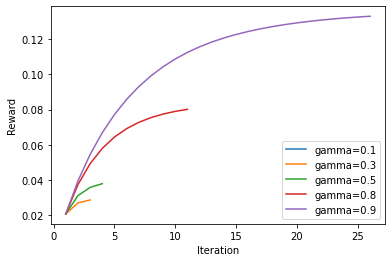

In [17]:
ex1.plot_gamma(ex1.df_vi_results)

# ex1.plot_gamma(ex1.df_qlearn_results1)
# ex1.plot_gamma(ex1.df_qlearn_results2)
# ex1.plot_gamma(ex1.df_qlearn_results3)

# df = ex1.df_vi_results
# range(len(df[df.gamma==0.3]['Iteration']))
# df

range(1, 5)
range(1, 5)
range(1, 5)
range(1, 6)
range(1, 6)


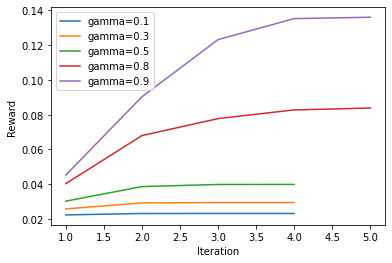

In [18]:
ex1.plot_gamma(ex1.df_pi_results)

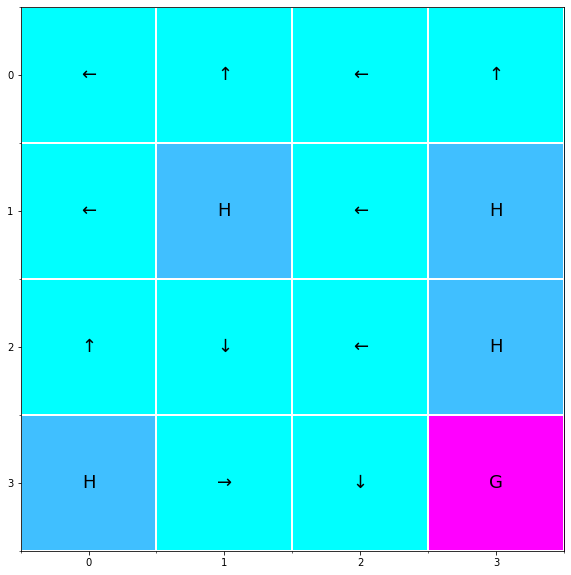

In [9]:
visualize_policy(ex1.vi_results[-1], (size1, size1), "{}x{}".format(size1,size1))

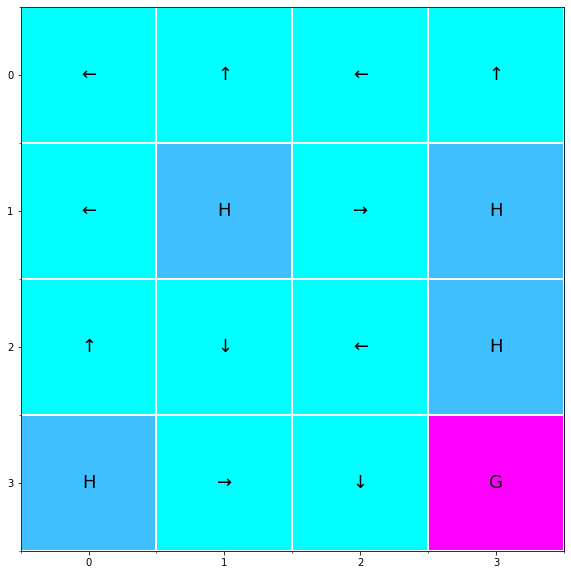

In [10]:
visualize_policy(ex1.pi_results[-1], (size1, size1), "{}x{}".format(size1,size1))

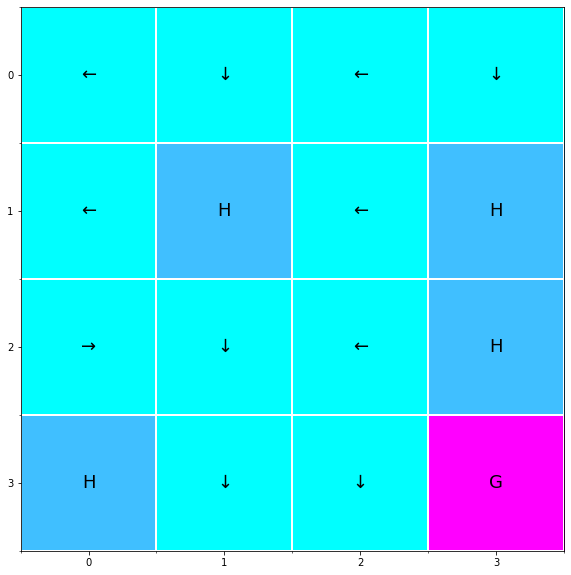

In [44]:
visualize_policy(ex1.qlearn_results1[-1], (size1, size1), "{}x{}".format(size1,size1))

In [12]:
ex2 = Experiment(P2,R2)

vi 0.1 0.0005419254302978516
vi 0.3 0.0006132125854492188
vi 0.5 0.0006010532379150391
vi 0.8 0.0009527206420898438
vi 0.9 0.001644134521484375
pi 0.1 0.003895998001098633
pi 0.3 0.002568960189819336
pi 0.5 0.002586841583251953
pi 0.8 0.0031909942626953125
pi 0.9 0.002151012420654297
q 0.1 0.1 0.1 4.308628082275391
q 0.1 0.1 0.5 4.223382949829102
q 0.1 0.1 1 4.216201066970825
q 0.1 0.3 0.1 4.24169397354126
q 0.1 0.3 0.5 4.215889930725098
q 0.1 0.3 1 4.228697299957275
q 0.1 0.5 0.1 4.218685865402222
q 0.1 0.5 0.5 4.3056981563568115
q 0.1 0.5 1 4.270709037780762
q 0.1 0.7 0.1 4.324842929840088
q 0.1 0.7 0.5 4.2592408657073975
q 0.1 0.7 1 4.260778903961182
q 0.1 1 0.1 4.260335683822632
q 0.1 1 0.5 4.260746002197266
q 0.1 1 1 4.260123014450073
q 0.3 0.1 0.1 4.203874826431274
q 0.3 0.1 0.5 4.174169063568115
q 0.3 0.1 1 4.253347158432007
q 0.3 0.3 0.1 4.203625202178955
q 0.3 0.3 0.5 4.249279975891113
q 0.3 0.3 1 4.233561038970947
q 0.3 0.5 0.1 4.223735809326172
q 0.3 0.5 0.5 4.21412014961242

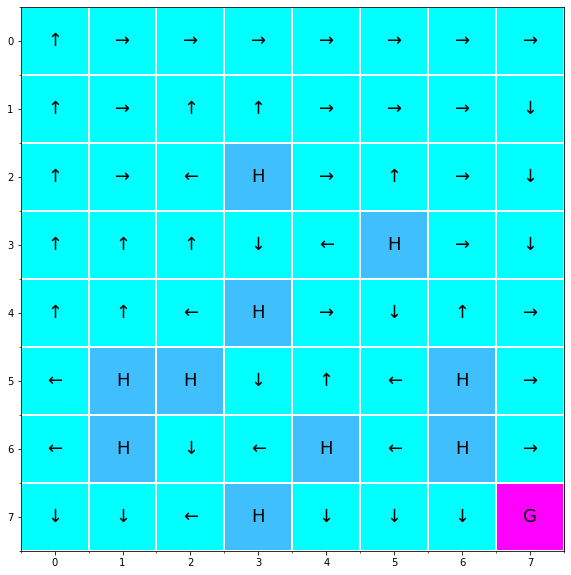

In [45]:
visualize_policy(ex2.vi_results[-1], (size2, size2), "{}x{}".format(size2,size2))

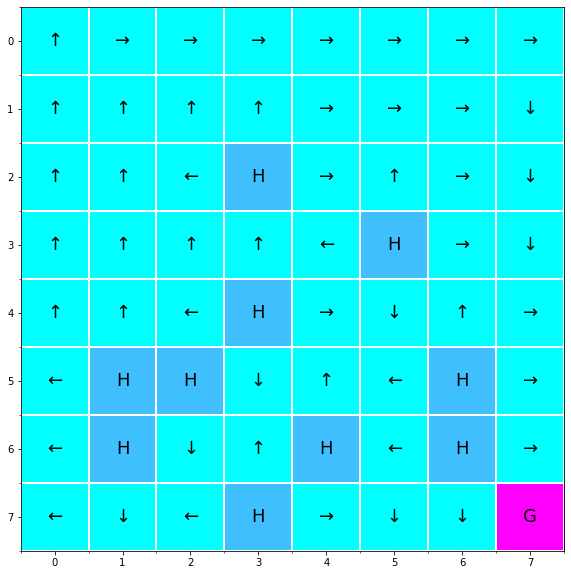

In [46]:
visualize_policy(ex2.pi_results[-1], (size2, size2), "{}x{}".format(size2,size2))

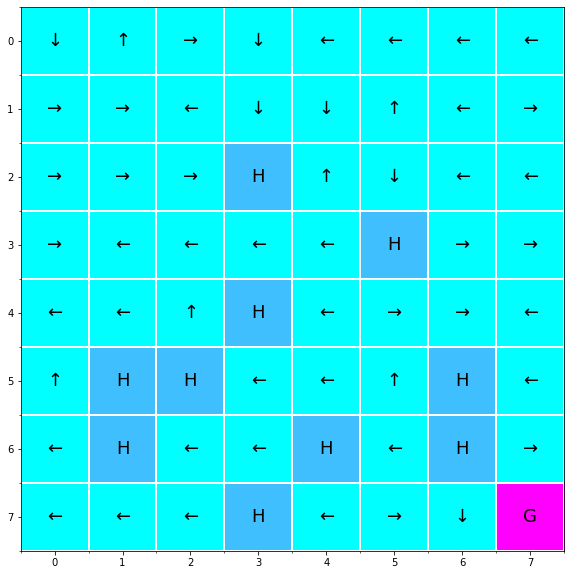

In [47]:
visualize_policy(ex2.qlearn_results1[-1], (size2, size2), "{}x{}".format(size2,size2))

range(1, 2)
range(1, 4)
range(1, 5)
range(1, 13)
range(1, 27)


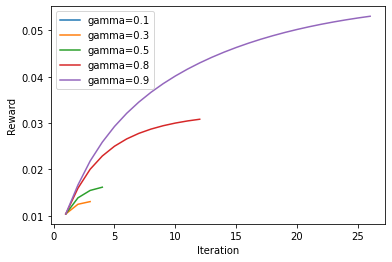

In [19]:

ex2.plot_gamma(ex2.df_vi_results)


range(1, 9)
range(1, 9)
range(1, 9)
range(1, 12)
range(1, 8)


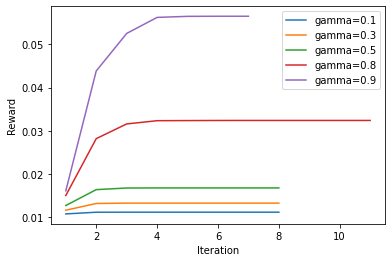

In [20]:
ex2.plot_gamma(ex2.df_pi_results)

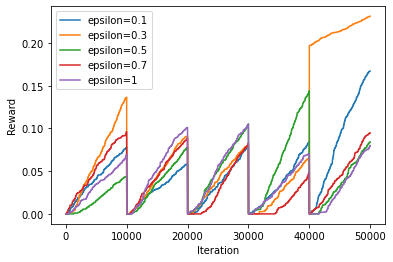

In [42]:
ex1.plot_eps(ex1.df_qlearn_results1, 'Max V')

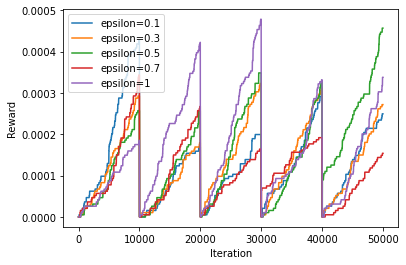

In [41]:
ex2.plot_eps(ex2.df_qlearn_results1)

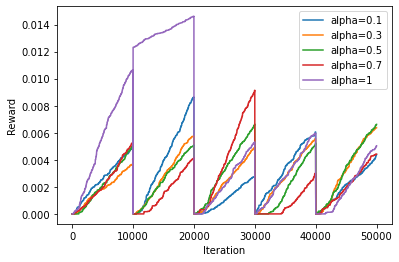

In [38]:
ex1.plot_alpha(ex1.df_qlearn_results1)

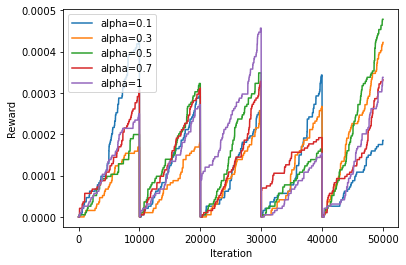

In [40]:
ex2.plot_alpha(ex2.df_qlearn_results1)

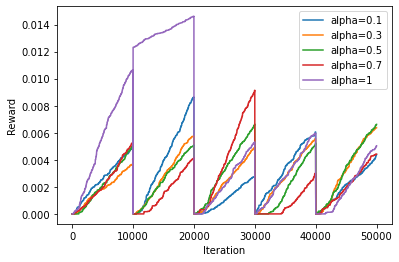

In [34]:
ex1.plot_alpha(ex1.df_qlearn_results1)

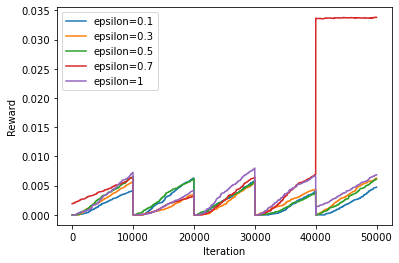

In [33]:
ex1.plot_eps(ex1.df_qlearn_results2)

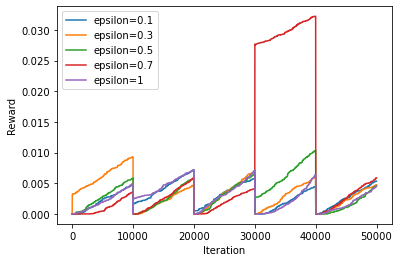

In [31]:
ex1.plot_eps(ex1.df_qlearn_results3)